<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Segment_Ajuste_mar_2021/Fig_05_BIG_Segmentation_mar_31_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)


In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     119  152.674728  155.000000  ...   39.806229   38.923874   37.636681
1     162   73.568359   74.152718  ...   58.321140   57.419601   58.403294
2     149   93.470757   52.097652  ...   83.379456   89.032066   93.460884
3     140   93.919998   97.119995  ...   46.919998   57.239998   70.879997
4     123  103.036354   88.712471  ...    7.918766    8.528192    8.169806
5     146   91.340782   91.987053  ...   74.215797   76.681366   77.213554
6     171   73.724289   71.752602  ...  103.501862  100.987320  102.441429
7     184    0.000000    0.145558  ...    6.283081    6.781663    6.300567
8     114   85.762085   82.796860  ...  138.173279  136.533081  131.830719
9     101   42.455544   40.375942  ...    0.000000    0.000000    0.000000
10    101   50.875599   49.812569  ...  124.096657  126.936874  124.719040
11    155   76.768044   77.085373  ...    5.967118    2.112216    2.019813
12    114    6.244690    

In [11]:
del df['Width']
print(df)

           0           1           2    ...         781         782         783
0   152.674728  155.000000  155.584793  ...   39.806229   38.923874   37.636681
1    73.568359   74.152718   71.945892  ...   58.321140   57.419601   58.403294
2    93.470757   52.097652   44.862793  ...   83.379456   89.032066   93.460884
3    93.919998   97.119995  100.559998  ...   46.919998   57.239998   70.879997
4   103.036354   88.712471   76.601295  ...    7.918766    8.528192    8.169806
5    91.340782   91.987053   97.362930  ...   74.215797   76.681366   77.213554
6    73.724289   71.752602   72.170074  ...  103.501862  100.987320  102.441429
7     0.000000    0.145558    1.173440  ...    6.283081    6.781663    6.300567
8    85.762085   82.796860   81.630348  ...  138.173279  136.533081  131.830719
9    42.455544   40.375942   43.113224  ...    0.000000    0.000000    0.000000
10   50.875599   49.812569   50.958633  ...  124.096657  126.936874  124.719040
11   76.768044   77.085373   79.223190  

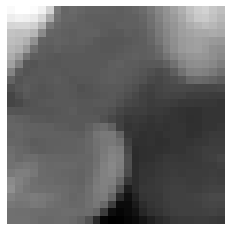

In [12]:
Size=28
#qual_img=7
#L = Width[qual_img]
data=np.array(df.iloc[0,:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.axis('off')
plt.imshow(Foto, cmap = "gray")

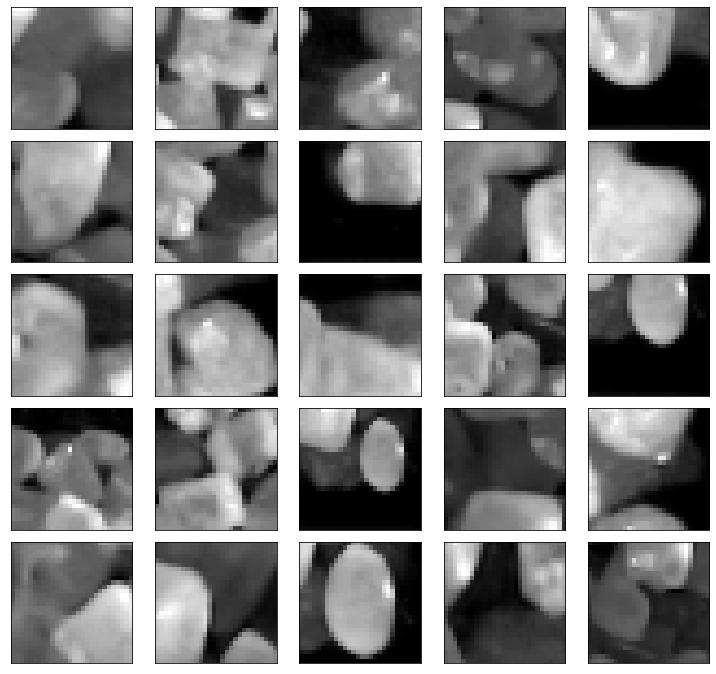

In [13]:
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)


In [14]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
filename = 'model_ANN.pkl'
model = joblib.load(filename)

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [15]:
prediction = model.predict(np.array(df))
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
